In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = df.drop(columns=["CustomerID"])

In [4]:
df_num = df.select_dtypes(include="number")

In [5]:
df_num.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [7]:
df = df.rename(columns={
    "Annual Income (k$)": "income",
    "Spending Score (1-100)": "spending"
})

df['spend_to_income'] = df['spending']/df['income']
df['spend_per_age'] = df['spending']/df['Age']
df['high_value'] = ((df['income']>df['income'].median()) & (df['spending']>df['spending'])).astype(int)
df['low_spender'] = (df['spending']<df['spending'].quantile(0.3)).astype(int)

df.head()

,Gender,Age,income,spending,spend_to_income,spend_per_age,high_value,low_spender
0,Male,19,15,39,2.600000,2.052632,0,1
1,Male,21,15,81,5.400000,3.857143,0,0
2,Female,20,16,6,0.375000,0.300000,0,1
3,Female,23,16,77,4.812500,3.347826,0,0
4,Female,31,17,40,2.352941,1.290323,0,0


In [8]:
df = df.drop(columns=['Gender'])
df.head()

,Age,income,spending,spend_to_income,spend_per_age,high_value,low_spender
0,19,15,39,2.600000,2.052632,0,1
1,21,15,81,5.400000,3.857143,0,0
2,20,16,6,0.375000,0.300000,0,1
3,23,16,77,4.812500,3.347826,0,0
4,31,17,40,2.352941,1.290323,0,0


In [9]:
from sklearn.preprocessing import StandardScaler

Scalar = StandardScaler()
x = Scalar.fit_transform(df)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_full = PCA()
pca_full.fit(x)

plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()
# print(pca_full)

PCA()


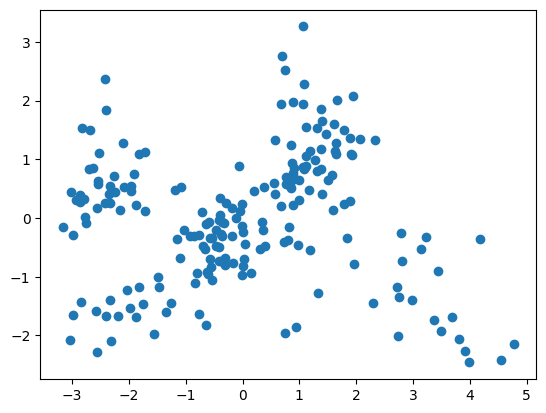

In [18]:
pca = PCA(n_components=3, random_state=42)
x_pca = pca.fit_transform(x)
# print(x_pca)
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.show()

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=3,
    init="k-means++",
    n_init=10,
    random_state=42
)

labels_km = kmeans.fit_predict(x_pca)

In [19]:
print(labels_km)

[0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 2 0 2 2 2 2 2 0 2 2 0 0 2 2 0 2 2 2 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 2 0 0 0 2 2 2 2 0 2 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


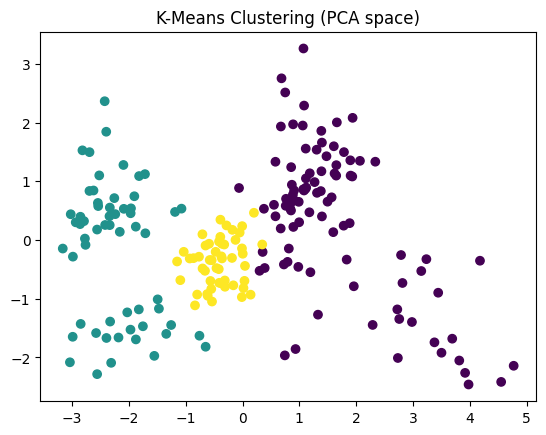

In [13]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=labels_km)
plt.title("K-Means Clustering (PCA space)")
plt.show()

In [14]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
    eps=0.6,
    min_samples=5
)

labels_db = dbscan.fit_predict(x_pca)


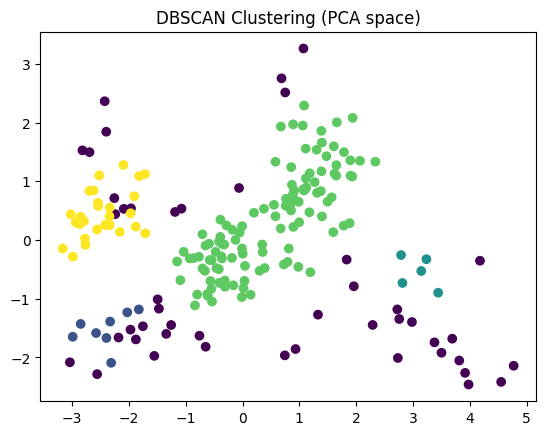

In [15]:
plt.scatter(x_pca[:,0],x_pca[:,1], c=labels_db)
plt.title("DBSCAN Clustering (PCA space)")
plt.show()

In [20]:
df['clusters'] = labels_km
print(df['clusters'])

0      0
1      0
2      1
3      0
4      0
      ..
195    0
196    1
197    0
198    1
199    0
Name: clusters, Length: 200, dtype: int32


In [21]:
df.groupby("clusters").mean()

,Age,income,spending,spend_to_income,spend_per_age,high_value,low_spender
clusters,,,,,,,
0,28.184783,60.391304,70.728261,1.579809,2.573771,0.0,0.01087
1,43.051724,65.568966,18.448276,0.388439,0.457789,0.0,1.00000
2,53.600000,55.060000,49.260000,0.916737,0.947672,0.0,0.00000


KeyError: 'Column not found: Gender'